# Telecom Customer Churn Analysis 

This notebook explores customer behavior in an Iranian telecom company using real-world customer data.  
We tackle three mini-challenges related to call behavior and tariff plans using data analysis and statistics.

**Dataset source:**  
Jafari-Marandi, R. et al. (2020). *Optimum Profit-Driven Churn Decision Making*. Neural Computing and Applications.


## Load and Preview the Dataset

In [41]:
import pandas as pd
churn = pd.read_csv("data/customer_churn.csv")
print(churn.shape)
churn.head(100)

(3150, 14)


,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19,0,19,2,6453,144,90,44,2,2,1,25,701.865,0
96,15,0,17,1,8993,174,78,42,5,1,1,55,254.505,0
97,11,0,18,4,2913,48,36,21,3,1,1,30,262.440,0
98,5,0,11,2,4450,43,220,12,3,1,1,30,1059.720,0


## Data Dictionary
| Column                  | Explanation                                             |
|-------------------------|---------------------------------------------------------|
| Call Failure            | number of call failures                                 |
| Complaints              | binary (0: No complaint, 1: complaint)                  |
| Subscription Length     | total months of subscription                            |
| Charge Amount           | ordinal attribute (0: lowest amount, 9: highest amount) |
| Seconds of Use          | total seconds of calls                                  |
| Frequency of use        | total number of calls                                   |
| Frequency of SMS        | total number of text messages                           |
| Distinct Called Numbers | total number of distinct phone calls                    |
| Age Group               | ordinal attribute (1: younger age, 5: older age)        |
| Tariff Plan             | binary (1: Pay as you go, 2: contractual)               |
| Status                  | binary (1: active, 2: non-active)                       |
| Age                     | age of customer                                         |
| Customer Value          | the calculated value of customer                        |
| Churn                   | class label (1: churn, 0: non-churn)                    |

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Which age groups send more SMS messages than make phone calls?
- 📊 **Visualize**: Create a plot visualizing the number of distinct phone calls by age group. Within the chart, differentiate between short, medium, and long calls (by the number of seconds).
- 🔎 **Analyze**: Are there significant differences between the length of phone calls between different tariff plans?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You have just been hired by a telecom company. A competitor has recently entered the market and is offering an attractive plan to new customers. The telecom company is worried that this competitor may start attracting its customers.

You have access to a dataset of the company's customers, including whether customers churned. The telecom company wants to know whether you can use this data to predict whether a customer will churn. They also want to know what factors increase the probability that a customer churns.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

## Challenge 1: Which Age Groups Send More SMS than Make Phone Calls?

We compare the total number of SMS messages vs phone calls by age group.  
Goal: Identify age groups where SMS usage exceeds call frequency.


In [42]:
usage_by_age=churn.groupby("Age Group")[["Frequency of SMS","Frequency of use"]].sum()
print(usage_by_age)

           Frequency of SMS  Frequency of use
Age Group                                    
1                      2484              9427
2                     78293             74742
3                    128311             97531
4                     16611             23922
5                      4802             13179


In [43]:
sms_more=usage_by_age[usage_by_age["Frequency of SMS"]>usage_by_age["Frequency of use"]]
print(sms_more)

           Frequency of SMS  Frequency of use
Age Group                                    
2                     78293             74742
3                    128311             97531


In [44]:
sms_more_age_group=sms_more.index.tolist()
print(sms_more_age_group)

[2, 3]


**Result:** Age Groups **2** and **3** send more SMS messages than they make phone calls.

## Challenge 2: Visualizing Call Length Categories by Age Group

We categorize calls as 'Short', 'Medium', or 'Long' based on `Seconds of Use`, then visualize  
the total number of distinct calls by age group and call length category.


In [45]:
print(churn['Seconds of Use'].describe())

def call_length_category(seconds):
    if seconds < 1391:
        return 'Short'
    elif seconds < 2990:
        return 'Medium'
    else:
        return 'Long'

churn['Call Length Category']=churn['Seconds of Use'].apply(call_length_category)
print(churn.head(6))

count     3150.000000
mean      4472.459683
std       4197.908687
min          0.000000
25%       1391.250000
50%       2990.000000
75%       6478.250000
max      17090.000000
Name: Seconds of Use, dtype: float64
   Call Failure  Complaints  ...  Churn  Call Length Category
0             8           0  ...      0                  Long
1             0           0  ...      0                 Short
2            10           0  ...      0                Medium
3            10           0  ...      0                  Long
4             3           0  ...      0                Medium
5            11           0  ...      0                  Long

[6 rows x 15 columns]


In [46]:
grouped=churn.groupby(["Age Group","Call Length Category"])["Distinct Called Numbers"].sum().reset_index()
print(grouped)

    Age Group Call Length Category  Distinct Called Numbers
0           1                 Long                     3097
1           1               Medium                     1077
2           1                Short                       48
3           2                 Long                    17692
4           2               Medium                     3641
5           2                Short                     2503
6           3                 Long                    21045
7           3               Medium                     7764
8           3                Short                     1832
9           4                 Long                     5440
10          4               Medium                     2898
11          4                Short                     1966
12          5                 Long                     3624
13          5               Medium                     1227
14          5                Short                      202


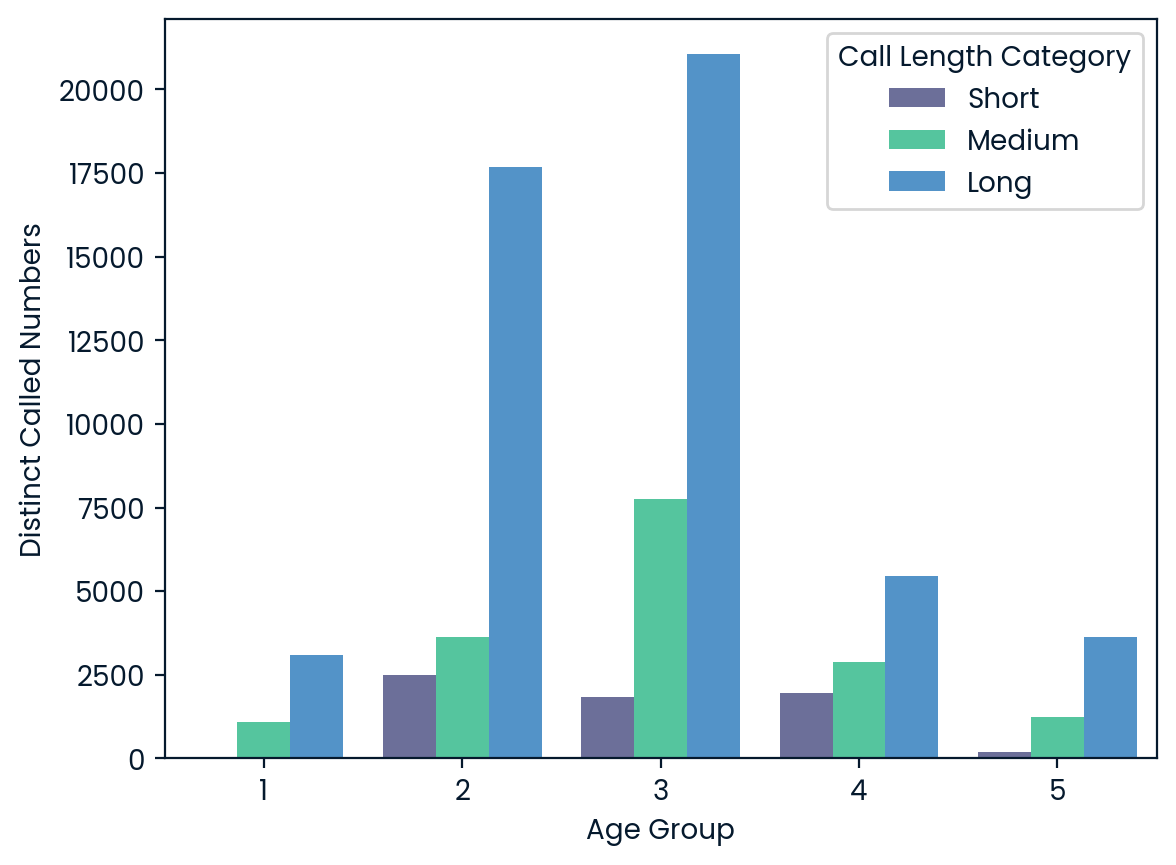

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=grouped, x='Age Group', y='Distinct Called Numbers', hue='Call Length Category',hue_order=['Short', 'Medium', 'Long'])
plt.show()

**Interpretation:**  
The chart shows how call patterns differ by age group. Younger groups (e.g., Group 2 and 3) tend to have higher total call activity across all lengths, especially long calls.

## Challenge 3: Are Call Durations Different Between Tariff Plans?

We use Welch's t-test to check if there's a statistically significant difference in call duration (`Seconds of Use`)  
between the two tariff plans: **1 (Pay-as-you-go)** and **2 (Contractual)**.

In [48]:
churn.groupby('Tariff Plan')['Seconds of Use'].describe()

,count,mean,std,min,25%,50%,75%,max
Tariff Plan,,,,,,,,
1,2905.0,4309.620998,4153.870563,0.0,1360.0,2858.0,6123.0,16785.0
2,245.0,6403.261224,4244.181070,300.0,2025.0,6560.0,7270.0,17090.0


In [49]:
from scipy.stats import ttest_ind

plan1=churn[churn['Tariff Plan']==1]['Seconds of Use']
plan2=churn[churn['Tariff Plan']==2]['Seconds of Use']

t_stat, p_value=ttest_ind(plan1, plan2, equal_var=False) 

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -7.43
P-value: 0.0000


**Result:**  
T-statistic = -7.43, p-value = 0.0000  
Since p < 0.05, the result is statistically significant.  
**Interpretation:** Customers on the contractual plan (Plan 2) make significantly longer calls than those on the pay-as-you-go plan (Plan 1).

## Conclusion

This notebook explored key behavioral patterns in telecom customer data through three focused questions:

- **Challenge 1:** Age groups 2 and 3 send more SMS than make calls.
- **Challenge 2:** Distinct call behavior varies by age and call length.
- **Challenge 3:** Contractual plan users have significantly longer call durations.

These findings could help telecom providers design better retention and engagement strategies for different customer segments.

[Source](https://www.kaggle.com/royjafari/customer-churn)  of dataset and [source](https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset) of dataset description. 

**Citation**: Jafari-Marandi, R., Denton, J., Idris, A., Smith, B. K., & Keramati, A. (2020). Optimum Profit-Driven Churn Decision Making: Innovative Artificial Neural Networks in Telecom Industry. Neural Computing and Applications.